In [276]:
#import Spark and MLlib packages
from pyspark import SparkContext, SparkConf
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

#import data analysis packages
import numpy as np
import pandas as pd
import sklearn

from pandas import Series, DataFrame
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from numpy import array

#import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#misc packages
from __future__ import division
from __future__ import print_function

In [203]:
#I SVM
#The dataset is picked from here https://github.com/mwaskom/seaborn-data
iris = sns.load_dataset("iris")

In [204]:
#Get the data size and feature size
data_size, feature_size = iris.shape
print("data_size is {}, feature_size is {}".format(data_size, feature_size))

data_size is 150, feature_size is 5


In [205]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [163]:
#(1)Data Cleaning
#We'll only do binary classification, which means getting only two species
#We will aim to distinguish Setosa and Versicolor
#Refer data structure at here 
#https://github.com/mwaskom/seaborn-data/blob/master/iris.csv

#1.Store the former 100 data set 
#2.Label Setosa as 0, Versicolor as 1
#3.Move Species column to the first column
#4.To get easlier plotting, use first two features

In [206]:
#1.Store the former 100 data set
iris_df = iris.ix[0:99]

In [207]:
#2.Label Setosa as 0, Versicolor as 1
species = iris_df.species
label_species = []
for i in range(len(species)):
    if species[i] == 'setosa':
        label_species.insert(i, 1)
    else:
        label_species.insert(i, 0)

In [208]:
#Convert list to Series so that it can be load to dataframe
series_species = Series(label_species, index = range(100))

In [209]:
#Reload Series to Species column 
iris_df['species'] = series_species
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [210]:
#3.Move Species column to the first column
cols = iris_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
iris_df = iris_df[cols]

In [211]:
print(iris_df.head())

   species  sepal_length  sepal_width  petal_length  petal_width
0        1           5.1          3.5           1.4          0.2
1        1           4.9          3.0           1.4          0.2
2        1           4.7          3.2           1.3          0.2
3        1           4.6          3.1           1.5          0.2
4        1           5.0          3.6           1.4          0.2


In [212]:
#4.To get easlier plotting, use first two features
cols = cols[:-2]
iris_df = iris_df[cols]

In [213]:
print(iris_df.head())

   species  sepal_length  sepal_width
0        1           5.1          3.5
1        1           4.9          3.0
2        1           4.7          3.2
3        1           4.6          3.1
4        1           5.0          3.6


In [217]:
#(2) Using Sciki-learn SVC 
data_col = cols[1:]

#Target data
Y = iris_df['species']

#Traning and testing dataset
X = iris_df[data_col] 

In [218]:
print(X.head())

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [219]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64


In [228]:
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [229]:
# SVM regularizaion parameter
C = 1.0

#Let's use different Kernel, whic is nothing but 
#the functions mapping data to hyper dimension

#SVC with a linear Kernel
svc = svm.SVC(kernel = 'linear', C=C).fit(X_train, Y_train)

# Guassian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma = 0.7, C=C).fit(X_train, Y_train)

# SVC with 3rd degree Polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, Y_train)

#SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X_train, Y_train)

In [247]:
#Calculate the fitting error
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    predicted = clf.predict(X_test)
    expected = Y_test
    # Compare results
    errors = metrics.accuracy_score(expected,predicted)
    print(errors)

1.0
1.0
1.0
1.0


In [253]:
#Let's using all dataset without train/test partitioning.
#For plotting purpose
svc = svm.SVC(kernel = 'linear', C=C).fit(X, Y)

# Guassian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma = 0.7, C=C).fit(X, Y)

# SVC with 3rd degree Polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

#SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

In [254]:
#(3)Setting the data visualization 
# Set the step size
h = 0.02

#Use X_test for prediction
# X axis
x_min=X["sepal_length"].min() - 1
x_max =X["sepal_length"].max() + 1

# Y axis
y_min = X["sepal_width"].min() - 1
y_max = X["sepal_width"].max() + 1

# create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [255]:
# titles
titles = ['SVC with linear kernel',
          'LinearSVC',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

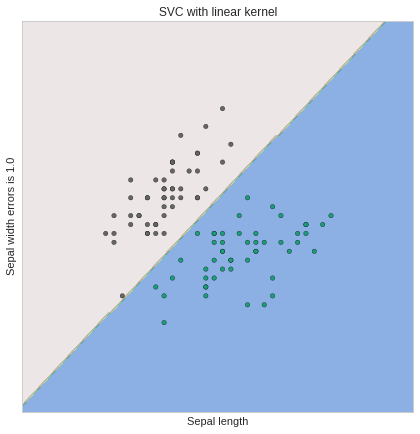

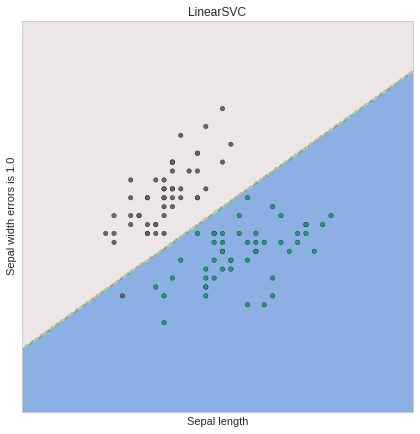

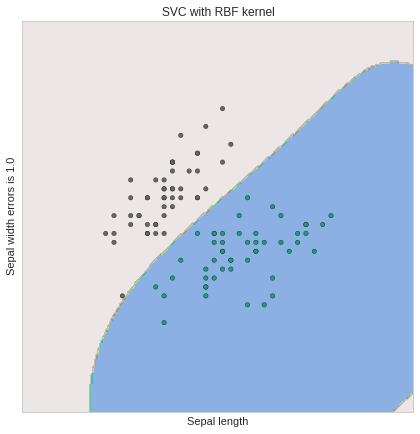

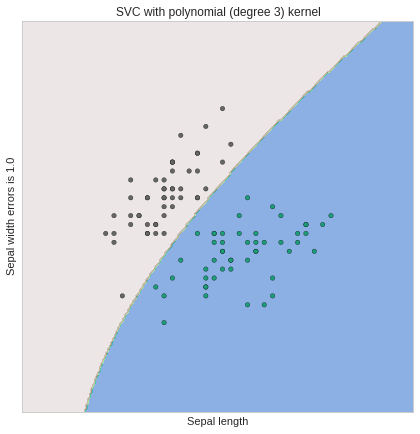

In [320]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(7,7))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(111)
    
    # Subplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X['sepal_length'], X['sepal_width'], c=Y, cmap=plt.cm.Dark2)
    
    #colculate the error
    #predicted = clf.predict(X_test)
    expected = Y_test
    # Compare results
    errors = metrics.accuracy_score(expected,predicted)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width errors is {}'.format(errors))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


plt.show()



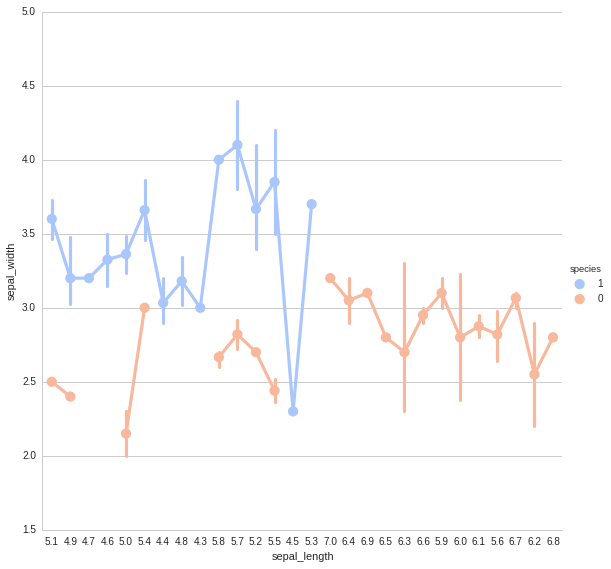

In [273]:
#II Let's using Logistric Regression
#let's study the correlation by factorplot
sns.factorplot("sepal_length", "sepal_width", data=iris_df, hue='species', palette='coolwarm', size=8)

In [277]:
#Let's train the model
log_model = LogisticRegression()

log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [279]:
#Predict the accuracy score
class_predict = log_model.predict(X_test)

print(metrics.accuracy_score(Y_test, class_predict))

1.0


In [297]:
#dump the tips to a local file for now
X_data_size = len(X['sepal_length'])
Y = np.vstack(Y)

fo = open("/usr/local/spark/examples/src/main/resources/iris_2.data", "w")
for i in range(X_data_size):    
    fo.write("{} {} {}\n".format(float(Y[i][0]), float(X['sepal_length'][i]), float(X['sepal_width'][i]))) 

fo.close()

In [298]:
#PySpark Part
sc = SparkContext("local", "SVM_LogisticRegression")

In [299]:
df_RDD = sc.textFile("/usr/local/spark/examples/src/main/resources/iris_2.data")

In [307]:
#III PySpark MLlib SVM

def parsePoint(line):
    values = [float(x) for x in line.split(' ')]
    return LabeledPoint(values[0], values[1:])

parsedData = df_RDD.map(parsePoint)


In [308]:
parsedData.take(10)

[LabeledPoint(1.0, [5.1,3.5]),
 LabeledPoint(1.0, [4.9,3.0]),
 LabeledPoint(1.0, [4.7,3.2]),
 LabeledPoint(1.0, [4.6,3.1]),
 LabeledPoint(1.0, [5.0,3.6]),
 LabeledPoint(1.0, [5.4,3.9]),
 LabeledPoint(1.0, [4.6,3.4]),
 LabeledPoint(1.0, [5.0,3.4]),
 LabeledPoint(1.0, [4.4,2.9]),
 LabeledPoint(1.0, [4.9,3.1])]

In [309]:
#Build the model
model = SVMWithSGD.train(parsedData, iterations=100)

In [310]:
#Evaluate
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count()/float(parsedData.count())
print("MLlib SVM Trainging Error = " + str(trainErr))

MLlib SVM Trainging Error = 0.01


In [312]:
#IV Using LogisticRegression
LogR_model = LogisticRegressionWithLBFGS.train(parsedData)

In [313]:
#Evaluate
LogR_labelsAndPreds = parsedData.map(lambda p: (p.label, LogR_model.predict(p.features)))
LogR_trainErr = LogR_labelsAndPreds.filter(lambda (v, p): v != p).count()/float(parsedData.count())
print("MLlib LogisticRegression Trainging Error = " + str(LogR_trainErr))

MLlib LogisticRegression Trainging Error = 0.01
